**1-Import Libraries to use**


In [4]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import os
from tensorflow.keras.models import *
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing import image


**2-read to data**

In [5]:
train_path = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
test_path = "/kaggle/input/fruit-and-vegetable-image-recognition/test"
val_path = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"
image_category =os.listdir("/kaggle/input/fruit-and-vegetable-image-recognition/train")

**3_ ploting of the data** 

In [6]:
def plot_image (image_category):

    plt.figure(figsize=(10,10))

    for i, catrgory in enumerate(image_category):

        image_path = train_path + '/' + catrgory
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_in_path = image_path+'/'+ first_image
        img= image.load_img(first_image_in_path)
        img_array = image.img_to_array(img) /255
        plt.subplot(7,6,i+1)
        plt.imshow(img_array)
        plt.title(catrgory)
        plt.axis('off')
    plt.show()
        

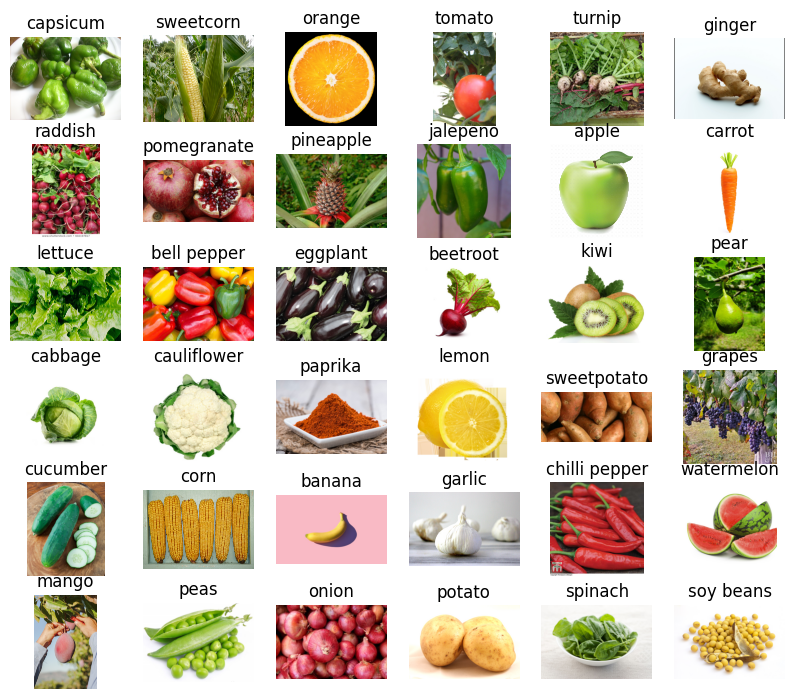

In [7]:
plot_image (image_category)

**4-Apply the suitable Image Preprocessing by using ImageDataGenerator**

In [8]:
train_generator = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_generator.flow_from_directory(
                                                train_path,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )

test_generator = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = test_generator.flow_from_directory(
                                                test_path,
                                             target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )
val_generator = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = val_generator.flow_from_directory(
                                                val_path,
                                               target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


**5-CNN Model Building**

In [9]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = 3,  padding = 'same', activation = 'relu',
                     input_shape = (224, 224, 3)))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',  activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters = 128, kernel_size = 3,  padding = 'same',   activation = 'relu'))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters=265, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(36, activation = 'softmax'))

In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

**6-compilering**

In [11]:
cnn_model.compile(
    optimizer='Adam', 
    loss ='categorical_crossentropy', 
    metrics=['accuracy'])

**7- fiting**

In [15]:
model_history = cnn_model.fit(train_image_generator,
                             epochs =10 ,
                             validation_data = val_image_generator,
                             )

Epoch 1/10
98/98 [==============================] - 92s 942ms/step - loss: 3.5790 - accuracy: 0.0289 - val_loss: 3.5884 - val_accuracy: 0.0256
Epoch 2/10
98/98 [==============================] - 92s 933ms/step - loss: 3.5791 - accuracy: 0.0302 - val_loss: 3.5882 - val_accuracy: 0.0256
Epoch 3/10
98/98 [==============================] - 92s 934ms/step - loss: 3.5789 - accuracy: 0.0321 - val_loss: 3.5880 - val_accuracy: 0.0256
Epoch 4/10
98/98 [==============================] - 90s 922ms/step - loss: 3.5791 - accuracy: 0.0321 - val_loss: 3.5884 - val_accuracy: 0.0256
Epoch 5/10
98/98 [==============================] - 91s 933ms/step - loss: 3.5787 - accuracy: 0.0321 - val_loss: 3.5876 - val_accuracy: 0.0256
Epoch 6/10
98/98 [==============================] - 92s 939ms/step - loss: 3.5788 - accuracy: 0.0276 - val_loss: 3.5879 - val_accuracy: 0.0285
Epoch 7/10
98/98 [==============================] - 92s 935ms/step - loss: 3.5788 - accuracy: 0.0315 - val_loss: 3.5883 - val_accuracy: 0.0256

In [16]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_history_2 = model.fit(
                         train_image_generator,
                             epochs =10 ,
                             validation_data = val_image_generator,
                               batch_size = 32,
     
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
98/98 [==============================] - 99s 958ms/step - loss: 1.7297 - accuracy: 0.5419 - val_loss: 0.4231 - val_accuracy: 0.8746
Epoch 2/10
98/98 [==============================] - 93s 951ms/step - loss: 0.6036 - accuracy: 0.8035 - val_loss: 0.3240 - val_accuracy: 0.9031
Epoch 3/10
98/98 [==============================] - 91s 929ms/step - loss: 0.3541 - accuracy: 0.8899 - val_loss: 0.2252 - val_accuracy: 0.9345
Epoch 4/10
98/98 [==============================] - 90s 926ms/step - loss: 0.2339 - accuracy: 0.9268 - val_loss: 0.2267 - val_accuracy: 0.9231
Epoch 5/10
98/98 [==============================] - 92s 942ms/step - loss: 0.1618 - accuracy: 0.9512 - val_loss: 0.1622 - val_accuracy: 0.9487
Epoch 6/10
98/98 [==============================] - 91s 931ms/step - loss: 0.1176 - accuracy: 0.9631 - val_loss: 0.2065 - val_accuracy: 0.9430
Epoch 7/10
98/98 [==============================] - 92s 937ms/step - loss: 0.08

**8-ploting the output accuarcy**

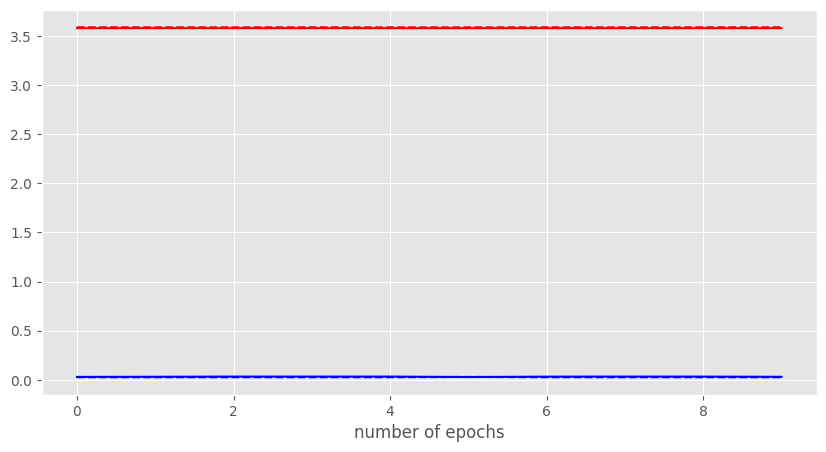

In [19]:
#plot history of loss and accuracy
hist = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()


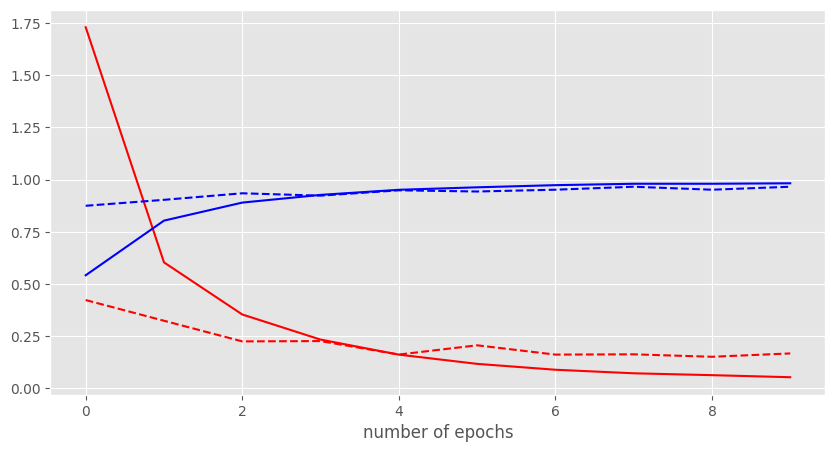

In [20]:
#plot history of loss and accuracy
hist = model_history_2.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()

**9-evaluating**

In [21]:
cnn_model.evaluate(test_image_generator)
cnn_model.evaluate(train_image_generator)
cnn_model.evaluate(val_image_generator)

11/11 [==============================] - 12s 1s/step - loss: 3.5886 - accuracy: 0.0256


[3.5885777473449707, 0.025641025975346565]

In [22]:
model.evaluate(test_image_generator)
model.evaluate(train_image_generator)
model.evaluate(val_image_generator)

11/11 [==============================] - 12s 1s/step - loss: 0.1676 - accuracy: 0.9658


[0.16757558286190033, 0.9658119678497314]

In [27]:
labels = {value: key for key, value in train_image_generator.class_indices.items()}

print("Label Mappings for classes \n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes 

0 : apple
1 : banana
2 : beetroot
3 : bell pepper
4 : cabbage
5 : capsicum
6 : carrot
7 : cauliflower
8 : chilli pepper
9 : corn
10 : cucumber
11 : eggplant
12 : garlic
13 : ginger
14 : grapes
15 : jalepeno
16 : kiwi
17 : lemon
18 : lettuce
19 : mango
20 : onion
21 : orange
22 : paprika
23 : pear
24 : peas
25 : pineapple
26 : pomegranate
27 : potato
28 : raddish
29 : soy beans
30 : spinach
31 : sweetcorn
32 : sweetpotato
33 : tomato
34 : turnip
35 : watermelon


In [39]:
ModelLoss, ModelAccuracy = cnn_model.evaluate(test_image_generator)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

12/12 [==============================] - 12s 958ms/step - loss: 3.5885 - accuracy: 0.0279
Test Loss is 3.588527202606201
Test Accuracy is 0.027855154126882553


In [43]:
ModelLoss, ModelAccuracy = model.evaluate(test_image_generator)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

12/12 [==============================] - 12s 951ms/step - loss: 0.1646 - accuracy: 0.9666
Test Loss is 0.164637953042984
Test Accuracy is 0.9665738344192505


In [44]:
class_map = dict([v,k] for k,v in train_image_generator.class_indices.items())
print(class_map)

{0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce', 19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}


In [79]:
import numpy as np
test_image_path ="/kaggle/input/fruit-and-vegetable-image-recognition/train/pineapple/Image_12.jpg"
def predictions(test_image_path, actual_label):

    #load and preprocessing image
    test_img = image.load_img(test_image_path, target_size = (224, 224))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))

    # prediction
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_label]


    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

1/1 [==============================] - 2s 2s/step


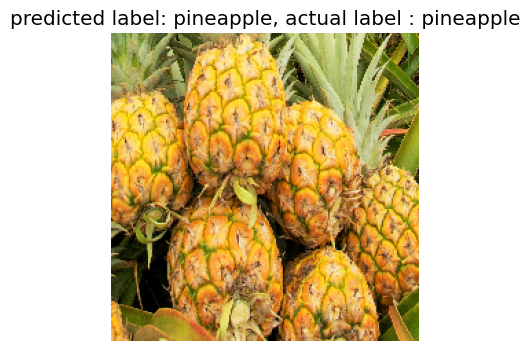

In [80]:
predictions(test_image_path, actual_label ="pineapple")

In [ ]:
model.save("Fruit_mmodel.h5")